In [139]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
from sklearn import svm
from matplotlib import pyplot as plt
from sklearn import tree

In [140]:
def perform_stratified_sampling(system_data, system_labels, test_set_size):
    selector = StratifiedShuffleSplit(n_splits = 1, test_size = test_set_size, random_state = 12120)
    
    for train_index, test_index in selector.split(system_data, system_labels):
        X_train, X_test = system_data[train_index, :], system_data[test_index, :]
        Y_train, Y_test = system_labels[train_index], system_labels[test_index]
    print("Training set: ", X_train.shape, " Test set: ", X_test.shape)
    
    for a_cat in range(len(np.unique(system_labels))):
        
        print("Proportion of points from category ", a_cat, " :")
        print("Full set: ", np.sum(system_labels == a_cat)/len(system_labels), 
              " Train set: ", np.sum(Y_train == a_cat)/len(Y_train), " Test set: ", np.sum(Y_test==a_cat)/len(Y_test))
        
    return X_train, X_test, Y_train, Y_test

In [141]:
heart_data_pd = pd.read_csv('heart.csv') 

In [142]:
heart_labels = heart_data_pd['target']
heart_data = heart_data_pd.drop(['target'], axis = 1)

In [143]:
heart_data = np.array(heart_data)
heart_labels = np.array(heart_labels)

In [144]:
train_set, test_set, train_labels, test_labels = perform_stratified_sampling(heart_data, heart_labels, 0.2)

Training set:  (242, 13)  Test set:  (61, 13)
Proportion of points from category  0  :
Full set:  0.45544554455445546  Train set:  0.45454545454545453  Test set:  0.45901639344262296
Proportion of points from category  1  :
Full set:  0.5445544554455446  Train set:  0.5454545454545454  Test set:  0.5409836065573771


In [145]:
heart_data_pd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [173]:
classifier = tree.DecisionTreeClassifier( max_depth = 8)
classifier = classifier.fit( train_set, train_labels )

print('Accuracy train set: ', classifier.score(train_set, train_labels), 
      '\nAccuracy test set: ', classifier.score(test_set, test_labels))

Accuracy train set:  0.9917355371900827 
Accuracy test set:  0.8360655737704918


In [174]:
feature_names = list((heart_data_pd.drop(["target"], axis = 1)).keys())
classes_names = list(heart_labels)
tree.export_graphviz(classifier, out_file="heart_disease.dot", feature_names = feature_names, class_names = list(str(classes_names)), rounded=True, filled=True)

In [175]:
!dot heart_disease.dot -Tpng -o image.png

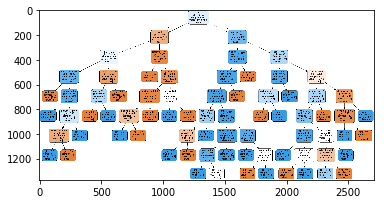

In [176]:
heart_tree = plt.imread("image.png")
plt.imshow(heart_tree)

In [220]:
random_index = np.random.choice(heart_data.shape[0])
random_patient = np.array(heart_data[random_index]).reshape(1, -1)
print("The random patient is the patient number " + str(random_index) + " in the dataset")

The random patient is the patient number 78 in the dataset


In [221]:
predicted = int(classifier.predict(random_patient)[0])
if predicted == 0:
    print("The random patient is healthy!!")
else:
    print("The random patient has a heart disease!!")

The random patient has a heart disease!!
